In [1]:
!pip install tensorflow==2.11.0 matplotlib
!pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 6.0 MB 36.9 MB/s 
     |████████████████████████████████| 1.7 MB 56.2 MB/s 
     |████████████████████████████████| 439 kB 80.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/dataset/archive.zip

Archive:  /content/drive/MyDrive/dataset/archive.zip
   creating: archive/
   creating: archive/Forest Recordings/
  inflating: archive/Forest Recordings/recording_00.mp3  
  inflating: archive/Forest Recordings/recording_01.mp3  
  inflating: archive/Forest Recordings/recording_02.mp3  
  inflating: archive/Forest Recordings/recording_03.mp3  
  inflating: archive/Forest Recordings/recording_04.mp3  
  inflating: archive/Forest Recordings/recording_05.mp3  
  inflating: archive/Forest Recordings/recording_06.mp3  
  inflating: archive/Forest Recordings/recording_07.mp3  
  inflating: archive/Forest Recordings/recording_08.mp3  
  inflating: archive/Forest Recordings/recording_09.mp3  
  inflating: archive/Forest Recordings/recording_10.mp3  
  inflating: archive/Forest Recordings/recording_11.mp3  
  inflating: archive/Forest Recordings/recording_12.mp3  
  inflating: archive/Forest Recordings/recording_13.mp3  
  inflating: archive/Forest Recordings/recording_14.mp3  
  inflating: ar

In [5]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

### **Paths of Files**

In [6]:
CAPUCHIN_FILE = '/content/archive/Parsed_Capuchinbird_Clips/XC3776-3.wav'
NOT_CAPUCHIN_FILE = '/content/archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [7]:
NOT_CAPUCHIN_FILE

'/content/archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

### **Build Dataloading Function**

In [8]:
def load_wav_16k_mono(filename): 
    file_contents = tf.io.read_file(filename) # Load encoded wav file
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1) # Decode wav (tensors by channels) 
    wav = tf.squeeze(wav, axis=-1) # Removes trailing axis
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)  
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000) # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    return wav

In [9]:
file_contents =tf.io.read_file(CAPUCHIN_FILE)

In [10]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [11]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

### **Plot Wave**

In [12]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

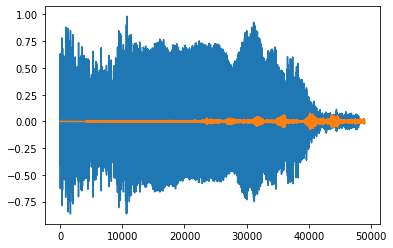

In [13]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

### **Create Tensorflow Dataset**

In [14]:
POS = '/content/archive/Parsed_Capuchinbird_Clips'
NEG = '/content/archive/Parsed_Not_Capuchinbird_Clips'

In [ ]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')